In [201]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
#from pyunicorn import climate
import seaborn as sns

In [141]:
#import pyunicorn

In [363]:
data = nc.Dataset('air.mon.mean.nc')
# informações sobre as variáveis ​​contidas no arquivo e suas dimensões.
print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    description: Data from NCEP initialized reanalysis (4x/day).  These are the 0.9950 sigma level values
    platform: Model
    Conventions: COARDS
    NCO: 20121012
    history: Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc air.mon.mean.nc
Thu May  4 18:11:50 2000: ncrcat -d time,0,622 /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc ./surface/air.mon.mean.nc
Mon Jul  5 23:47:18 1999: ncrcat ./air.mon.mean.nc /Datasets/ncep.reanalysis.derived/surface/air.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/surface/air.mon.mean.nc
/home/hoop/crdc/cpreanjuke2farm/cpreanjuke2farm Mon Oct 23 21:04:20 1995 from air.sfc.gauss.85.nc
created 95/03/13 by Hoop (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2014/09
    title: monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    Re

In [145]:
# printando todas as dimensoes
for dim in data.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 73
<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 897


In [146]:
# acessando os metadados das variaveis
for var in data.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
    actual_range: [ 90. -90.]
    long_name: Latitude
    standard_name: latitude
    axis: Y
unlimited dimensions: 
current shape = (73,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [  0.  357.5]
    standard_name: longitude
    axis: X
unlimited dimensions: 
current shape = (144,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time
    delta_t: 0000-01-00 00:00:00
    avg_period: 0000-01-00 00:00:00
    prev_avg_period: 0000-00-01 00:00:00
    standard_name: time
    axis: T
    units: hours since 1800-01-01 00:00:0.0
    actual_range: [1297320. 1951848.]
unlimited dimensions: time
current shape = (897,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.V

In [364]:
#np.array(data['air'])

In [365]:
#data['air']

In [366]:
air = data['air'][:]
a = []
lt = []
lg = []

for i in range(len(data['lat'])):
    for j in range(len(data['lon'])):
        x=air[0:898, i, j]
        lt_aux = list(data['lat'][:])[i]
        lg_aux = list(data['lon'][:])[j]
        lt.append(lt_aux)
        lg.append(lg_aux)
        a.append(x)


In [349]:
df = pd.DataFrame()
for i,j,k in zip(a,lt,lg):
    d=pd.DataFrame({
        'air':i,
        'lat':j,
        "long":k
    })
    df=pd.concat([df, d])

In [350]:
df

,air,lat,long
0,-34.926773,90.0,0.0
1,-33.311375,90.0,0.0
2,-29.716127,90.0,0.0
3,-23.678997,90.0,0.0
4,-5.309671,90.0,0.0
...,...,...,...
892,-53.745163,-90.0,357.5
893,-49.509178,-90.0,357.5
894,-56.505661,-90.0,357.5
895,-51.793552,-90.0,357.5


In [356]:
df[(df['lat']==30) & (df['long']==90)]['air']

0     -18.477736
1     -19.034824
2     -15.400640
3     -10.062331
4      -6.734190
         ...    
892    -2.887913
893     1.398325
894     4.035474
895     5.232250
896     3.036657
Name: air, Length: 897, dtype: float32

<AxesSubplot:ylabel='air'>

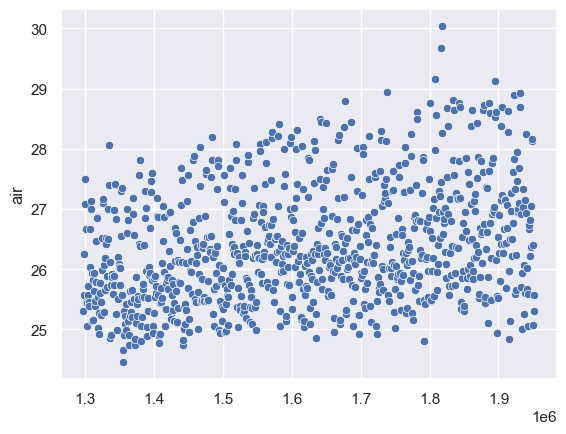

In [371]:
sns.scatterplot(x=data['time'][:] ,y = df[(df['lat']==2.5) & (df['long']==55)]['air'])

In [122]:
#import xarray as xr
#data = nc.Dataset('air.mon.mean.nc')